Index(['year', 'name', 'percent', 'sex'], dtype='object')
Top 5 Male Names:
 name
John       5.299585
James      4.574991
William    4.409453
Robert     3.821662
Charles    2.518147
Name: percent, dtype: float64

Top 5 Female Names:
 name
Mary         4.511860
Elizabeth    1.392100
Margaret     1.360965
Helen        1.234222
Anna         1.195867
Name: percent, dtype: float64


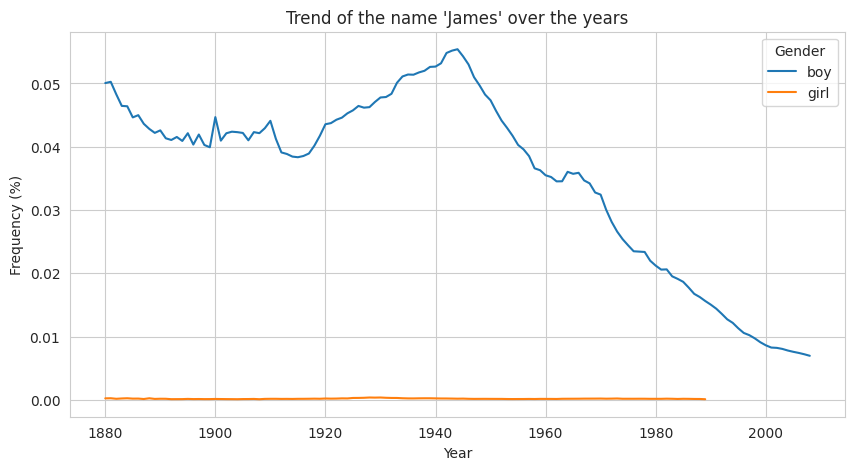

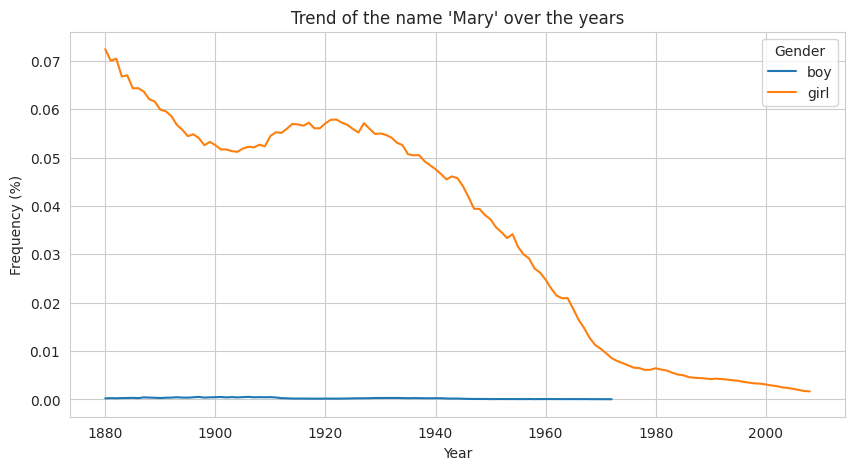


Top Names Per Decade:
       decade      name   sex   percent
1747     1880      John   boy  0.764880
2254     1880      Mary  girl  0.662382
4815     1890      John   boy  0.655642
5270     1890      Mary  girl  0.559511
7696     1900      John   boy  0.577876
8153     1900      Mary  girl  0.519519
10795    1910      Mary  girl  0.560328
10383    1910      John   boy  0.544213
13273    1920      Mary  girl  0.565646
13638    1920    Robert   boy  0.506538
16097    1930    Robert   boy  0.544311
15729    1930      Mary  girl  0.518685
17641    1940     James   boy  0.527460
18177    1940      Mary  girl  0.434203
20093    1950     James   boy  0.413064
20645    1950      Mary  girl  0.318718
23221    1960   Michael   boy  0.426833
22993    1960      Lisa  girl  0.265910
25800    1970   Michael   boy  0.413498
25190    1970  Jennifer  girl  0.355712
28446    1980   Michael   boy  0.345842
27850    1980   Jessica  girl  0.254181
31130    1990   Michael   boy  0.224069
30508    1990   J

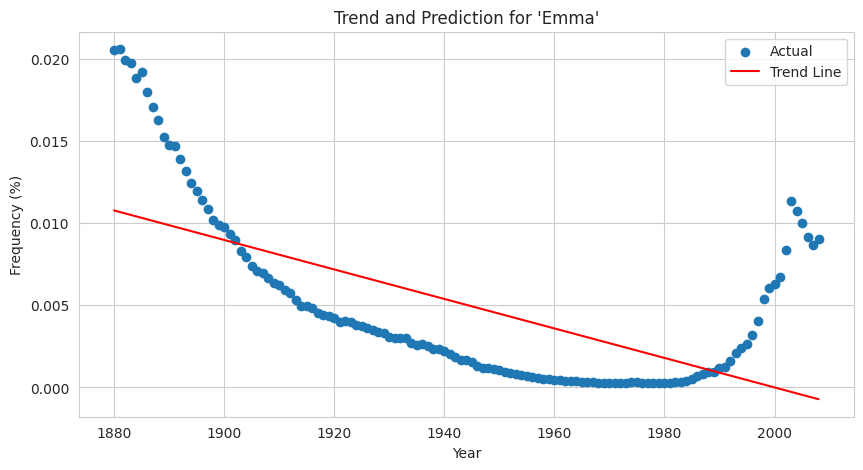

Predicted popularity of 'Emma' in 2030: -0.00269


In [ ]:
# -*- coding: utf-8 -*-
"""Welcome To Colab

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/notebooks/intro.ipynb
"""

# ==========================
# Trend Analysis of Baby Names
# ==========================

# Install missing packages if necessary
# !pip install pandas matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Set Seaborn style
sns.set_style('whitegrid')

# ---------------------------------
# 1. Load Dataset
# ---------------------------------
# Note: Replace the URL with your dataset path if needed
url = 'https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv'
df = pd.read_csv(url)

# Preview data
df.head()

# ---------------------------------
# 2. Data Preprocessing
# ---------------------------------
# Check columns
print(df.columns)

# Rename columns if necessary
df.columns = ['year', 'name', 'percent', 'sex']

# Since 'percent' is a fraction of births, let's assume total births is roughly constant to use frequency
# Group by year, name, and gender
df_grouped = df.groupby(['year', 'name', 'sex']).sum().reset_index()

# Display grouped data
df_grouped.head()

# ---------------------------------
# 3. Explore Popular Names
# ---------------------------------

# Top 5 most popular male and female names overall
top_male = df_grouped[df_grouped['sex'] == 'boy'].groupby('name')['percent'].sum().sort_values(ascending=False).head(5)
top_female = df_grouped[df_grouped['sex'] == 'girl'].groupby('name')['percent'].sum().sort_values(ascending=False).head(5)

print("Top 5 Male Names:\n", top_male)
print("\nTop 5 Female Names:\n", top_female)

# ---------------------------------
# 4. Trend of Specific Names
# ---------------------------------

def plot_name_trend(name):
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df_grouped[df_grouped['name'].str.lower() == name.lower()], x='year', y='percent', hue='sex')
    plt.title(f"Trend of the name '{name}' over the years")
    plt.xlabel('Year')
    plt.ylabel('Frequency (%)')
    plt.legend(title='Gender')
    plt.show()

# Example: Plot trend for 'James' and 'Mary'
plot_name_trend('James')
plot_name_trend('Mary')

# ---------------------------------
# 5. General Trends: Most Popular Names per Decade
# ---------------------------------

# Create a 'decade' column
df_grouped['decade'] = (df_grouped['year'] // 10) * 10

# Top names per decade
top_names_decade = df_grouped.groupby(['decade', 'name', 'sex'])['percent'].sum().reset_index()
top_names_decade = top_names_decade.sort_values(['decade', 'percent'], ascending=[True, False]).groupby(['decade', 'sex']).head(1)

print("\nTop Names Per Decade:")
print(top_names_decade)

# ---------------------------------
# 6. Trend Prediction Using Regression
# ---------------------------------

# Example: Predict popularity of "Emma" over time
name = "Emma"
data_emma = df_grouped[(df_grouped['name'].str.lower() == name.lower()) & (df_grouped['sex'] == 'girl')]

# Reshape for sklearn
X = data_emma['year'].values.reshape(-1,1)
y = data_emma['percent'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10,5))
plt.scatter(data_emma['year'], data_emma['percent'], label='Actual')
plt.plot(data_emma['year'], y_pred, color='red', label='Trend Line')
plt.title(f"Trend and Prediction for '{name}'")
plt.xlabel('Year')
plt.ylabel('Frequency (%)')
plt.legend()
plt.show()

# Predict future value (e.g., 2030)
future_year = np.array([[2030]])
predicted = model.predict(future_year)
print(f"Predicted popularity of '{name}' in 2030: {predicted[0]:.5f}")



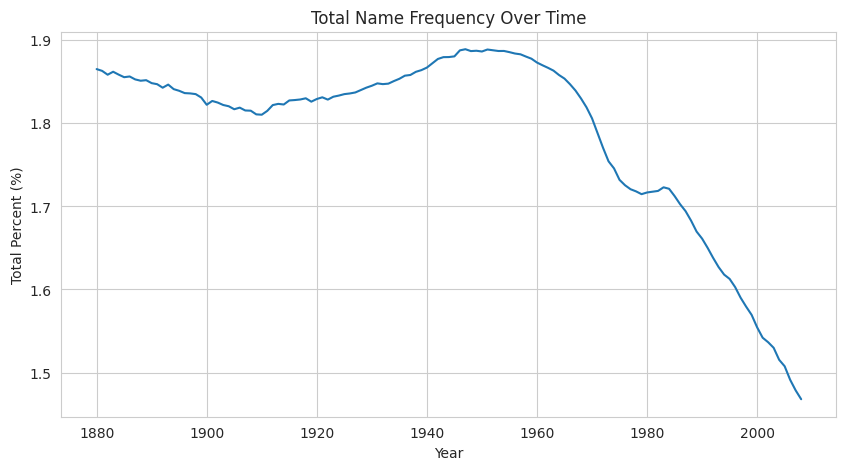

In [ ]:
# Aggregate total popularity per year
yearly_trend = df_grouped.groupby('year')['percent'].sum().reset_index()

# Plot to inspect trend
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_trend, x='year', y='percent')
plt.title("Total Name Frequency Over Time")
plt.xlabel("Year")
plt.ylabel("Total Percent (%)")
plt.show()


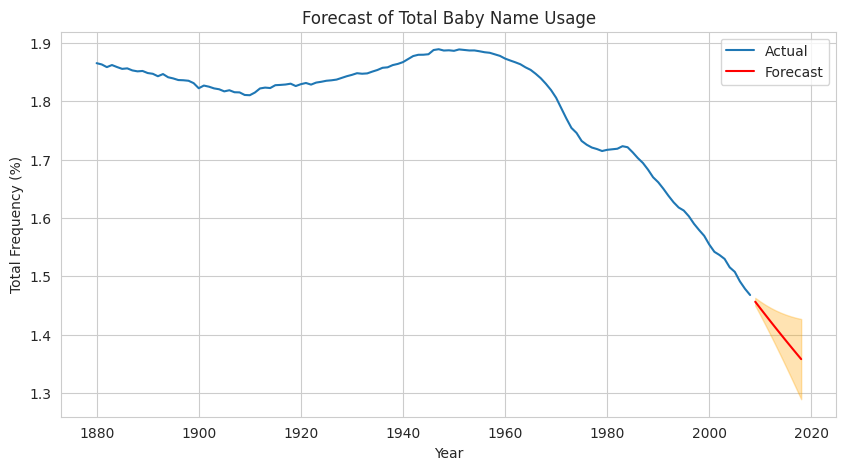

Forecast for total name usage (percent) in future years:

129    1.456443
130    1.445071
131    1.433812
132    1.422666
133    1.411630
134    1.400704
135    1.389888
136    1.379179
137    1.368577
138    1.358081
Name: predicted_mean, dtype: float64


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Set index to year
ts_all = yearly_trend.set_index('year')['percent']

# Fit ARIMA model
model_all_arima = ARIMA(ts_all, order=(1, 1, 1))  # adjust order as needed
results_all = model_all_arima.fit()

# Forecast next 10 years
forecast_all = results_all.get_forecast(steps=10)
forecast_index = np.arange(ts_all.index.max() + 1, ts_all.index.max() + 11)

# Plot
plt.figure(figsize=(10,5))
plt.plot(ts_all, label='Actual')
plt.plot(forecast_index, forecast_all.predicted_mean, color='red', label='Forecast')
plt.fill_between(forecast_index,
                 forecast_all.conf_int()['lower percent'],
                 forecast_all.conf_int()['upper percent'],
                 color='orange', alpha=0.3)
plt.title("Forecast of Total Baby Name Usage")
plt.xlabel("Year")
plt.ylabel("Total Frequency (%)")
plt.legend()
plt.show()

# Print forecast
print("Forecast for total name usage (percent) in future years:\n")
print(forecast_all.predicted_mean)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpougd6uty/5iqssobr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpougd6uty/v2lomxn7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19571', 'data', 'file=/tmp/tmpougd6uty/5iqssobr.json', 'init=/tmp/tmpougd6uty/v2lomxn7.json', 'output', 'file=/tmp/tmpougd6uty/prophet_modelkl__8ede/prophet_model-20250507162213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


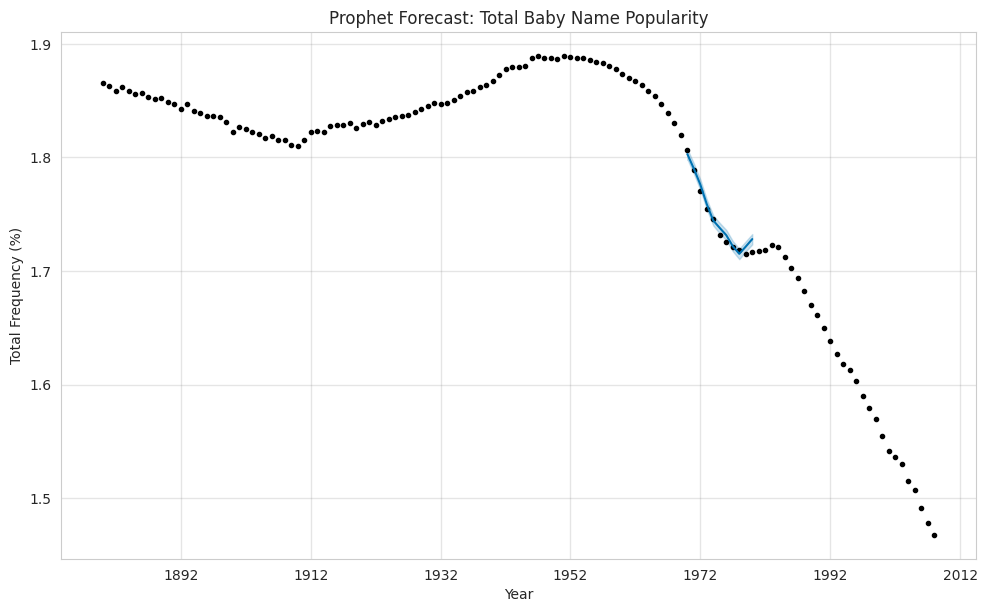

,ds,yhat,yhat_lower,yhat_upper
129,1970-12-31 00:00:00.000002008,1.790119,1.785692,1.794699
130,1971-12-31 00:00:00.000002008,1.776106,1.771432,1.780556
131,1972-12-31 00:00:00.000002008,1.758727,1.754170,1.762952
132,1973-12-31 00:00:00.000002008,1.744366,1.739915,1.748863
133,1974-12-31 00:00:00.000002008,1.737831,1.732988,1.742239
134,1975-12-31 00:00:00.000002008,1.731491,1.727031,1.736164
135,1976-12-31 00:00:00.000002008,1.721804,1.717370,1.726384
136,1977-12-31 00:00:00.000002008,1.715116,1.710372,1.719550
137,1978-12-31 00:00:00.000002008,1.721494,1.717202,1.726117
138,1979-12-31 00:00:00.000002008,1.728082,1.723359,1.732519


In [ ]:
from prophet import Prophet

# Rename columns for Prophet
prophet_df_all = yearly_trend.rename(columns={'year': 'ds', 'percent': 'y'})

# Fit model
model_all = Prophet()
model_all.fit(prophet_df_all)

# Forecast next 10 years
future_all = model_all.make_future_dataframe(periods=10, freq='Y')
forecast_all = model_all.predict(future_all)

# Plot
model_all.plot(forecast_all)
plt.title("Prophet Forecast: Total Baby Name Popularity")
plt.xlabel("Year")
plt.ylabel("Total Frequency (%)")
plt.show()

# Show predictions
forecast_all[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


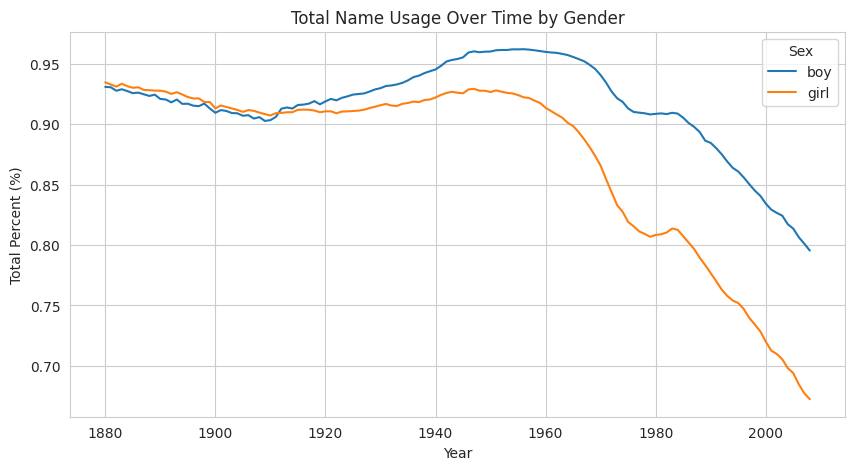

In [ ]:
# Total percent by year and sex
year_sex_trend = df_grouped.groupby(['year', 'sex'])['percent'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=year_sex_trend, x='year', y='percent', hue='sex')
plt.title("Total Name Usage Over Time by Gender")
plt.xlabel("Year")
plt.ylabel("Total Percent (%)")
plt.legend(title='Sex')
plt.show()


In [ ]:
# Aggregate yearly popularity by gender
trend_by_gender = df_grouped.groupby(['year', 'sex'])['percent'].sum().reset_index()

# Pivot for easier time series modeling
pivot_gender = trend_by_gender.pivot(index='year', columns='sex', values='percent').reset_index()
pivot_gender.columns.name = None  # Clean column names
pivot_gender.head()


,year,boy,girl
0,1880,0.930746,0.934546
1,1881,0.930439,0.932690
2,1882,0.927532,0.930985
3,1883,0.928777,0.933314
4,1884,0.927289,0.931352


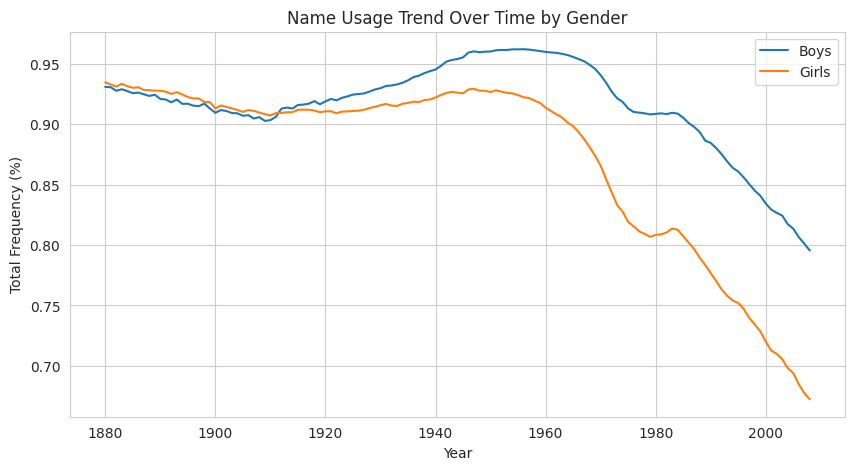

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=pivot_gender, x='year', y='boy', label='Boys')
sns.lineplot(data=pivot_gender, x='year', y='girl', label='Girls')
plt.title("Name Usage Trend Over Time by Gender")
plt.xlabel("Year")
plt.ylabel("Total Frequency (%)")
plt.legend()
plt.show()


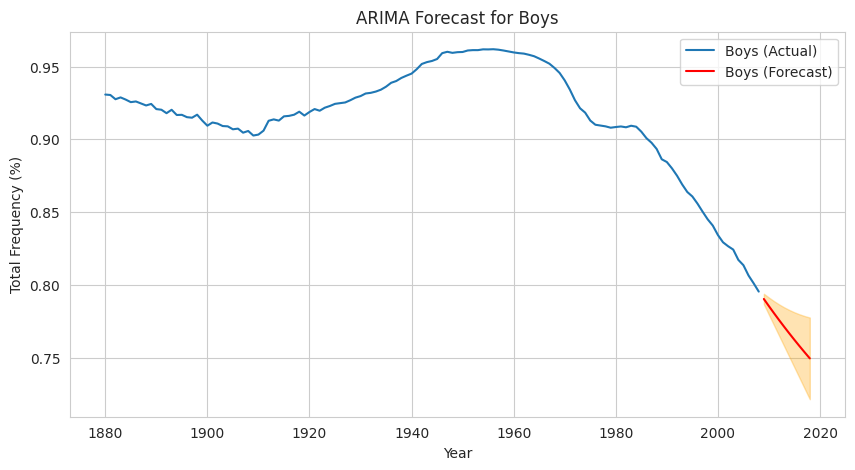

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Time series
boy_ts = pivot_gender.set_index('year')['boy']

# ARIMA
model_boy = ARIMA(boy_ts, order=(1, 1, 1))
results_boy = model_boy.fit()

# Forecast
boy_forecast = results_boy.get_forecast(steps=10)
future_years = np.arange(boy_ts.index.max() + 1, boy_ts.index.max() + 11)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(boy_ts, label='Boys (Actual)')
plt.plot(future_years, boy_forecast.predicted_mean, color='red', label='Boys (Forecast)')
plt.fill_between(future_years,
                 boy_forecast.conf_int()['lower boy'],
                 boy_forecast.conf_int()['upper boy'],
                 color='orange', alpha=0.3)
plt.title("ARIMA Forecast for Boys")
plt.xlabel("Year")
plt.ylabel("Total Frequency (%)")
plt.legend()
plt.show()


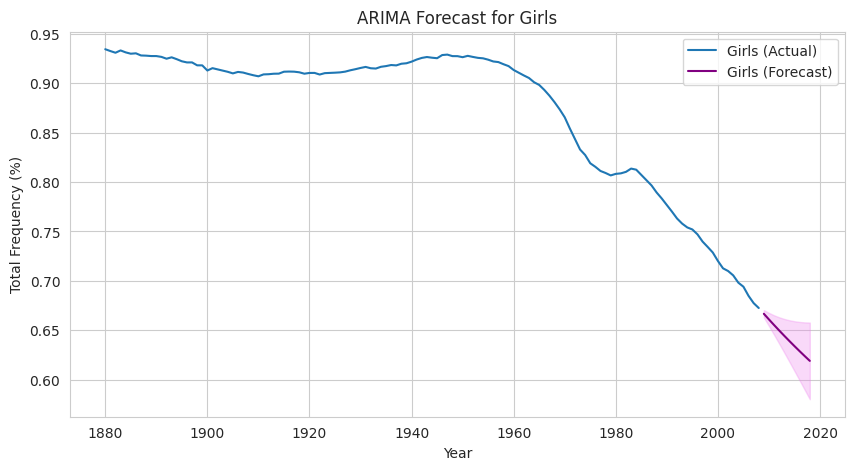

In [ ]:
# Time series
girl_ts = pivot_gender.set_index('year')['girl']

# ARIMA
model_girl = ARIMA(girl_ts, order=(1, 1, 1))
results_girl = model_girl.fit()

# Forecast
girl_forecast = results_girl.get_forecast(steps=10)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(girl_ts, label='Girls (Actual)')
plt.plot(future_years, girl_forecast.predicted_mean, color='purple', label='Girls (Forecast)')
plt.fill_between(future_years,
                 girl_forecast.conf_int()['lower girl'],
                 girl_forecast.conf_int()['upper girl'],
                 color='violet', alpha=0.3)
plt.title("ARIMA Forecast for Girls")
plt.xlabel("Year")
plt.ylabel("Total Frequency (%)")
plt.legend()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpougd6uty/nmar8d8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpougd6uty/pxz05n49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25820', 'data', 'file=/tmp/tmpougd6uty/nmar8d8l.json', 'init=/tmp/tmpougd6uty/pxz05n49.json', 'output', 'file=/tmp/tmpougd6uty/prophet_modelczpy1iok/prophet_model-20250507162357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


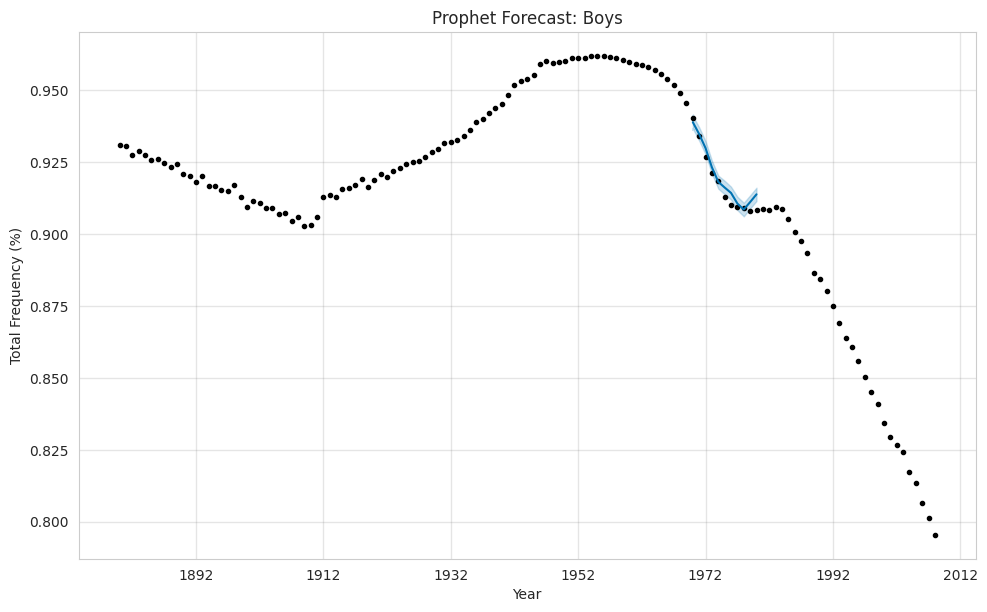

In [ ]:
from prophet import Prophet

# Prepare data
boy_df = pivot_gender[['year', 'boy']].rename(columns={'year': 'ds', 'boy': 'y'})

# Model
boy_model = Prophet()
boy_model.fit(boy_df)

# Forecast
future_boy = boy_model.make_future_dataframe(periods=10, freq='Y')
forecast_boy = boy_model.predict(future_boy)

# Plot
boy_model.plot(forecast_boy)
plt.title("Prophet Forecast: Boys")
plt.xlabel("Year")
plt.ylabel("Total Frequency (%)")
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpougd6uty/wbdvvynm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpougd6uty/yixciqeq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28396', 'data', 'file=/tmp/tmpougd6uty/wbdvvynm.json', 'init=/tmp/tmpougd6uty/yixciqeq.json', 'output', 'file=/tmp/tmpougd6uty/prophet_modeljzo0f33a/prophet_model-20250507162413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


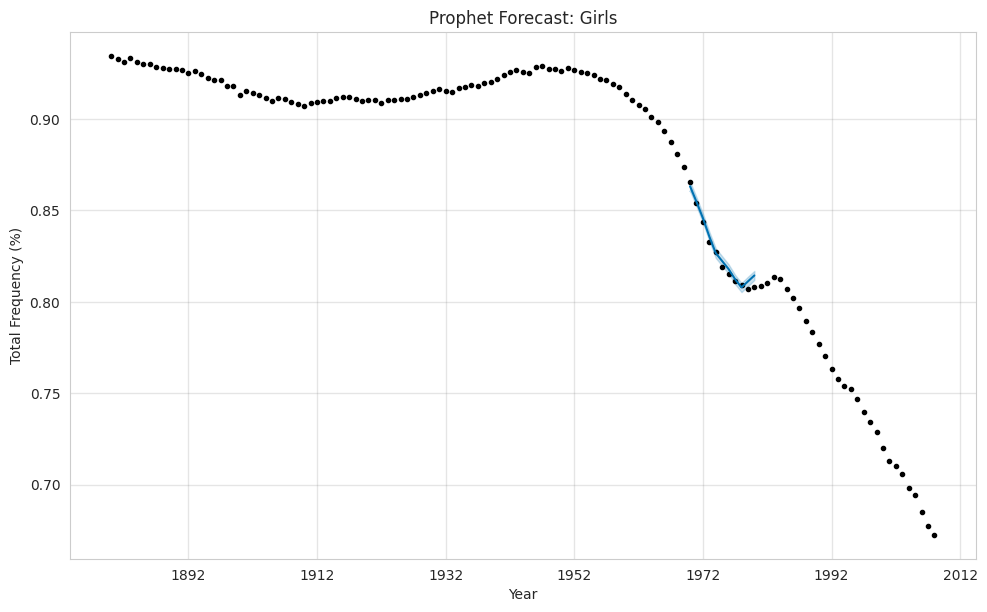

In [ ]:
# Prepare data
girl_df = pivot_gender[['year', 'girl']].rename(columns={'year': 'ds', 'girl': 'y'})

# Model
girl_model = Prophet()
girl_model.fit(girl_df)

# Forecast
future_girl = girl_model.make_future_dataframe(periods=10, freq='Y')
forecast_girl = girl_model.predict(future_girl)

# Plot
girl_model.plot(forecast_girl)
plt.title("Prophet Forecast: Girls")
plt.xlabel("Year")
plt.ylabel("Total Frequency (%)")
plt.show()


In [ ]:
# Pivot: names as rows, years as columns
name_year_matrix = df_grouped.pivot_table(index='name', columns='year', values='percent', fill_value=0)

# Standardize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled = scaler.fit_transform(name_year_matrix)

# Cluster
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled)
name_year_matrix['cluster'] = clusters

# View names in each cluster
for c in range(5):
    print(f"\nCluster {c}:")
    print(name_year_matrix[name_year_matrix['cluster'] == c].index[:10].tolist())



Cluster 0:
['Aaden', 'Aaliyah', 'Aarav', 'Ab', 'Abagail', 'Abb', 'Abbey', 'Abbie', 'Abbigail', 'Abbott']

Cluster 1:
['Alan', 'Allen', 'Anita', 'Ann', 'Anne', 'Barbara', 'Bernard', 'Beverly', 'Billy', 'Bobby']

Cluster 2:
['Agnes', 'Albert', 'Alfred', 'Alice', 'Anna', 'Annie', 'Arthur', 'Bertha', 'Bessie', 'Betty']

Cluster 3:
['Aaron', 'Adam', 'Alexander', 'Amanda', 'Amber', 'Amy', 'Andrew', 'Angela', 'Anthony', 'Ashley']

Cluster 4:
['James', 'John', 'Mary', 'Robert', 'William']


In [ ]:
import ruptures as rpt

# Drop 'cluster' column if present
if 'cluster' in name_year_matrix.columns:
    name_year_matrix = name_year_matrix.drop(columns='cluster')

# Names to analyze
all_names = name_year_matrix.index.tolist()

# Dictionary to store breakpoints
changepoints = {}

# Detect changepoints for each name
for name in all_names:
    signal = name_year_matrix.loc[name].values
    model = rpt.Pelt(model="rbf").fit(signal)
    breakpoints = model.predict(pen=10)

    if len(breakpoints) > 1:  # If there's a meaningful change
        changepoints[name] = breakpoints


In [ ]:
# Sort names by number of changepoints
most_changed = sorted(changepoints.items(), key=lambda x: len(x[1]), reverse=True)
print("Top names with most changepoints:")
for name, breaks in most_changed[:10]:
    print(f"{name}: {breaks}")


Top names with most changepoints:
Jimmie: [20, 45, 70, 100, 129]
Aileen: [20, 55, 115, 129]
Aldo: [30, 50, 100, 129]
Allie: [30, 60, 110, 129]
Alton: [25, 65, 95, 129]
Alvin: [25, 60, 85, 129]
Alyce: [25, 50, 75, 129]
Anastasia: [50, 85, 105, 129]
Angelina: [20, 55, 90, 129]
Antoinette: [25, 55, 110, 129]


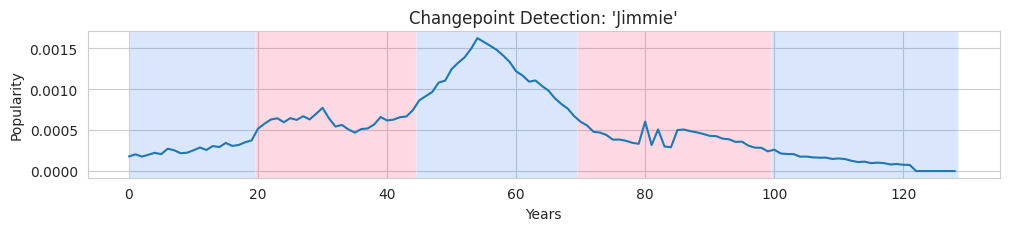

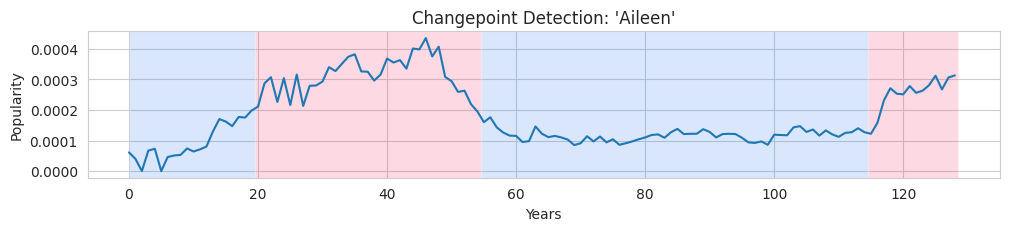

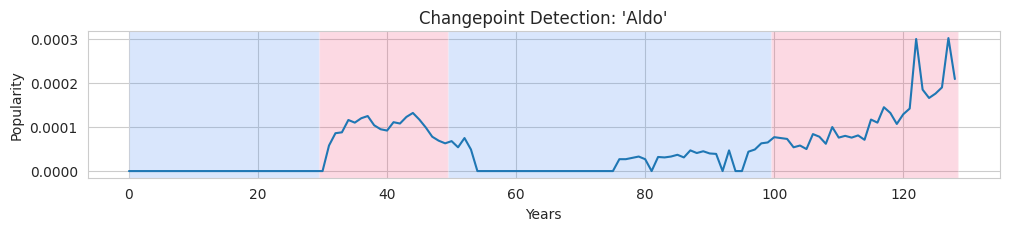

In [ ]:
def plot_changepoints(name):
    signal = name_year_matrix.loc[name].values
    breakpoints = changepoints.get(name, [])
    if not breakpoints:
        print(f"No changepoints found for {name}")
        return

    rpt.display(signal, breakpoints)
    plt.title(f"Changepoint Detection: '{name}'")
    plt.xlabel("Years")
    plt.ylabel("Popularity")
    plt.show()

# Example: Top 3 names with biggest change
for name, _ in most_changed[:3]:
    plot_changepoints(name)


In [ ]:
def extract_features(name):
    name = name.lower()
    return {
        'first_letter': name[0],
        'last_letter': name[-1],
        'length': len(name),
        'vowel_count': sum(1 for c in name if c in 'aeiou'),
        'consonant_count': sum(1 for c in name if c.isalpha() and c not in 'aeiou')
    }

# Apply to unique names
df_unique = df_grouped[['name', 'sex']].drop_duplicates()
features = pd.DataFrame([extract_features(n) for n in df_unique['name']])
features['sex'] = df_unique['sex']


NameError: name 'df_grouped' is not defined